In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


[-0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2]
[0.4141107289442573, -0.2999568238983028, 0.8601546475454714, -0.09983456476122736, 0.7971119032218372, 0.2316687879734005, 1.0, 1.9966283283598154, 1.7409232668608754, 2.212388020120313, 1.0, 2.3, 2.3, 0.546043722097041, 0.36422691538982604, 0.10480065409283068, -0.07619358581252496, 0.9, 0.2628156171967468, 1.0, 1.1430955037976267, 1.3920382299185368, 1.7769948819884511, 1.7559342207161612, 2.146108827311767, 2.3, 0.23352208217718196, 1.0, 0.8644980023003166, 0.12216782206345696, 0.8517451552202826, 0.9, 1.0, 1.1023419156366796, 1.3647158812146234, 1.3656379081700387, 1.4819236238373312, 1.8924

,true,pred,nll,absolute error
horizon,,,,
5,1.0,1.111784,5.428664,0.445341
10,1.0,1.047374,9.641763,0.234683
15,1.0,1.071629,15.885864,0.305258
20,1.0,1.001841,19.680211,0.209873
25,1.0,1.002312,27.396065,0.207475
30,1.0,1.068183,33.995004,0.177864


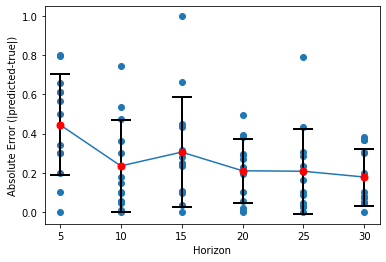

In [3]:
# Generate the plots for Experiment 1 results about unbiasedness and consistency for error (pred parameter - true parameter) and absolute error

# HORIZONS 5, 10, 15, 20, 25, 30
# risk min = -0.2
# risk max = 2.2

data = np.load('Expanded_Domain_Horizon-20210114.npz')
print(data)

true_risk_param = data['true_risk_param']
true_risk_param_list = [item for sublist in true_risk_param for item in sublist]
print(true_risk_param_list)      
        
pred_risk = data['pred_risk_param']  
pred_risk_list = [item for sublist in pred_risk for item in sublist]
print(pred_risk_list) 


ic_hzn = data['ic_hzn']
ic_hzn_list = [item for sublist in ic_hzn for item in sublist]
print(ic_hzn_list)

nll = data['nll']
nll_list = [item for sublist in nll for item in sublist]
print(nll_list)


dictionary = dict()
dictionary = {'true': true_risk_param_list, 'pred': pred_risk_list,'horizon': ic_hzn_list,'nll':nll_list}
df = pd.DataFrame.from_dict(dictionary)

df['absolute error'] = np.abs(df['pred']-df['true'])
# df['raw error'] = df['pred']-df['true']

fig, ax = plt.subplots()
ax.set_xlabel('Horizon')
ax.set_ylabel('Absolute Error (|predicted-true|)')
ax.scatter(ic_hzn, df['absolute error'])


print(df)
std_dict=dict()
hzn = [5, 10, 15, 20, 25, 30]
for i in hzn:
    error = df[df['horizon']==i]
    std_dict[i]=error['absolute error'].std()
    
# get the means of the absolute error for each horizon
df = df.groupby('horizon').mean()

plt.scatter(df.index,df['absolute error'])
plt.xlabel('Horizon')
plt.ylabel('Absolute Error (|predicted-true|)')

plt.plot(df.index,df['absolute error'])
plt.xlabel('Horizon')
plt.ylabel('Absolute Error (|predicted-true|)')

# plot the standard deviation bars
std_array=[]
for i in df.index:
    std_array.append(std_dict[i])
print(df)
plt.errorbar(df.index,df['absolute error'], yerr=std_array, fmt='o', color='red', ecolor='black', ms=7, 
             elinewidth=2, capsize=10, capthick=2)

